In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

# Week 5: Lecture 10 ##

In [2]:
united = Table.read_table('data/united.csv')
united # flight info from Summer of 2015, from United Airlines
# questions - are flights late more often than they are on time?
united.sort('Delay', descending = True)

Date,Flight Number,Destination,Delay
6/21/15,1964,SEA,580
6/22/15,300,HNL,537
6/21/15,1149,IAD,508
6/20/15,353,ORD,505
8/23/15,1589,ORD,458
7/23/15,1960,LAX,438
6/23/15,1606,ORD,430
6/4/15,1743,LAX,408
6/17/15,1122,HNL,405
7/27/15,572,ORD,385


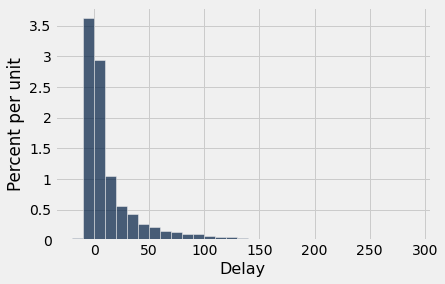

In [3]:
united.hist('Delay', bins = np.arange(-20, 300, 10))

In [4]:
delays = united.column('Delay')
population_mean = np.mean(delays)
population_sd = np.std(delays)

population_mean, population_sd

(16.658155515370705, 39.480199851609314)

In [5]:
def one_sample_mean(sample_size):
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [7]:
help(Table.sample)

Help on function sample in module datascience.tables:

sample(self, k=None, with_replacement=True, weights=None)
    Return a new table where k rows are randomly sampled from the
    original table.
    
    Args:
        ``k`` -- specifies the number of rows (``int``) to be sampled from
           the table. Default is k equal to number of rows in the table.
    
        ``with_replacement`` -- (``bool``) By default True;
            Samples ``k`` rows with replacement from table, else samples
            ``k`` rows without replacement.
    
        ``weights`` -- Array specifying probability the ith row of the
            table is sampled. Defaults to None, which samples each row
            with equal probability. ``weights`` must be a valid probability
            distribution -- i.e. an array the length of the number of rows,
            summing to 1.
    
    Raises:
        ValueError -- if ``weights`` is not length equal to number of rows
            in the table; or, if ``weig

In [8]:
def ten_thousand_sample_means(sample_size):
    means = make_array()
    for i in np.arange(10000):
        means = np.append(means, one_sample_mean(sample_size))
    return means

In [9]:
"""Empirical distribution of random sample means"""

def plot_sample_means(sample_size):
    means = ten_thousand_sample_means(sample_size)
    sample_means = Table().with_column('Sample Means', means)
    
    # Display empirical histogram and print all relevant quantities
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(united.column('Delay')))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(united.column('Delay')))
    print("SD of sample means:", np.std(means))

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.63691
Population SD: 39.480199851609314
SD of sample means: 3.910659122437035


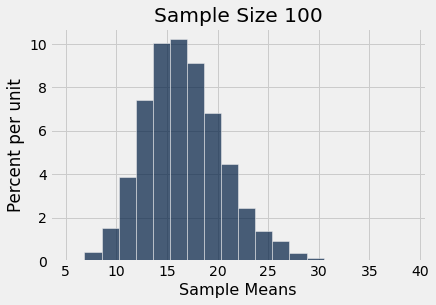

In [10]:
plot_sample_means(100)

In [16]:
#Population SD: 39.480199851609314
#SD of sample means: 3.910659122437035
39.480199851609314/np.sqrt(100)

3.9480199851609314

In [17]:
39.480199851609314/3.9106

10.09568860318348

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.62421325
Population SD: 39.480199851609314
SD of sample means: 1.9503314623159411


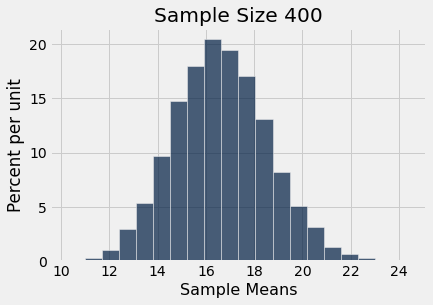

In [11]:
plot_sample_means(400)

In [14]:
#sample size = 400
#Population SD: 39.480199851609314
#SD of sample means: 1.9503314623159411
# SD = population SD / sqrt(sample_size)

39.480199851609314/np.sqrt(400) # should equal to 1.95

1.9740099925804657

In [18]:
39.480199851609314/1.95

20.246256334158623

Sample size:  900
Population mean: 16.658155515370705
Average of sample means:  16.662512999999997
Population SD: 39.480199851609314
SD of sample means: 1.3174954413738502


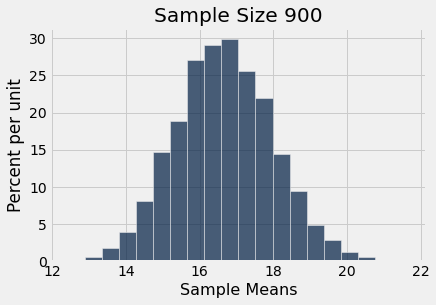

In [12]:
plot_sample_means(900)

In [15]:
#Population SD: 39.480199851609314
#SD of sample means: 1.3174954413738502
39.480199851609314/(np.sqrt(900))

1.3160066617203106

In [20]:
39.480199851609314/1.3174954413738502

29.966099776740315

## SD of the sample mean

In [21]:
# Warning: this cell will take a long time to run!
sample_sizes = np.arange(100, 950, 50) # (100, 150, 200, ...900)

sample_mean_sds = make_array()
for n in sample_sizes:
    sample_means = ten_thousand_sample_means(n)
    sample_mean_sds = np.append(sample_mean_sds, np.std(sample_means))

In [22]:
sd_table = Table().with_columns(
    'Sample size', sample_sizes,
    'SD of simulated sample means', sample_mean_sds,
    'Pop SD / sqrt(sample size)', population_sd / np.sqrt(sample_sizes),
)
sd_table

Sample size,SD of simulated sample means,Pop SD / sqrt(sample size)
100,3.94684,3.94802
150,3.22475,3.22354
200,2.77556,2.79167
250,2.50927,2.49695
300,2.28228,2.27939
350,2.07066,2.11031
400,1.97518,1.97401
450,1.85711,1.86111
500,1.75416,1.76561
550,1.67531,1.68344


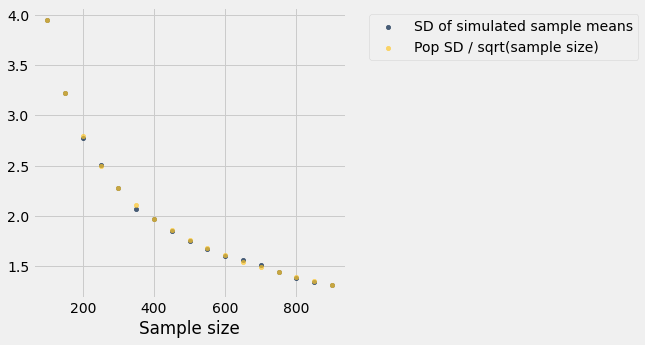

In [23]:
sd_table.scatter('Sample size')

## SD of 0/1 Population ##

In [24]:
# Population of size 10

number_of_ones = 2
zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))
zero_one_population

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
np.mean(zero_one_population)
#what does this number below mean?
# 2 ones in my population
# the rest are 8

0.2

In [26]:
np.std(zero_one_population)
# what does the number below mean, in regards to our average above?
# one standard deviation away from the average of 0.2, is 0.4


0.4000000000000001

In [27]:
# Let's make a graph with proportion of ones on the x axis and SD on the y axis

In [28]:
def sd_of_zero_one_population(number_of_ones):
    """SD of a population with num_ones ones and (10 - num_ones) zeros"""
    zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))
    return np.std(zero_one_population)

In [29]:
poss_ones = np.arange(11) # (0, 1....10)
zero_one_pop = Table().with_columns(
    'Number of ones', poss_ones,
    'Proportion of ones', poss_ones / 10
)
zero_one_pop

Number of ones,Proportion of ones
0,0
1,0.1
2,0.2
3,0.3
4,0.4
5,0.5
6,0.6
7,0.7
8,0.8
9,0.9


In [30]:
sds = zero_one_pop.apply(sd_of_zero_one_population, 'Number of ones')
zero_one_pop = zero_one_pop.with_column('SD', sds)

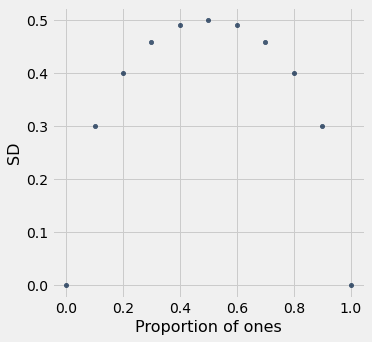

In [31]:
zero_one_pop.scatter('Proportion of ones', 'SD')

In [ ]:
# make 1-2 observations and write them here:

